Project 3 House Dataset

Goals of this project:
 - Use machine learning
 - Gain insight into the data that can be useful
 - Not trying to develop the best overall model, but a good specific model that is useable
 
 Market Audience:
 - Home appraiser
 - House Flipper (looking on insights for purchasing or what to add improve for sell)
 - Real Estate agent looking for a quick model for helping owners improve sellability
 
Tools:
 - Python
 - ?????
 - packages (see below in import statements)


Step 1:
Approaching from a house flipper:
Do certain neighborhoods have better opportunity for flipping?
- low to high price in neighborhood?
- easy remedy to increase price (i.e. pave driveway? convert basement to bedroom, etc...?
- difference between well maintained and poor maintained house?
- remodel kitchen?

## Descriptive Modeling

In [175]:
# Import Statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder



## Step 2: Get the Data
- do I need more data? like -
- - Housing index
- - Mortgage rates
- - Length of time to sell
- - Schools
- - Tax rate (assuming all rates are the same for year of sell because all are within Ames City Limits

In [2]:
# load data

train=pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')

data_list = [train, test, sample]

## Step 3: Missing Data

In [7]:
for lst in data_list:
    print('*' * 80)
    print('Data Head - ')
    print(lst.head()) 
    missing_values_col = lst.isna().sum()
    print("Columns with missing data counts")
    print(missing_values_col.sort_values(ascending=False))
    missing_values = lst.isna().sum().sum()
    print("Shape: ", lst.shape)
    print("Total Missing: ", missing_values)
    print("Percent Missing: ", missing_values / (lst.shape[0]*lst.shape[1]) * 100)
    print('*' * 80)




********************************************************************************
Data Head - 
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN      

From above, both test and learning data have some missing data that needs to be addressed.  Based on the data documentation, it looks like most of the missing can be attributed to no value.

# A function for finding missing value counts

In [32]:
def find_missing (df):
    missing_values_col = df.isna().sum()
    print(missing_values_col.sort_values(ascending=False))
    return missing_values_col

In [34]:
pd.set_option('display.max_rows', 500)
(find_missing(train))
print(train.PoolQC.unique())
#for i, val in enumerate(find_missing(train)):
    #print(train.iloc[:,i].unique(), val)

#print(train.groupby('PoolQC').agg('YearRemodAdd', 'count'))
# 'PoolQC', 

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
LotConfig           0
OverallCond         0
OverallQual         0
HouseStyle          0
BldgType            0
Condition2          0
BsmtFinSF1          0
MSZoning            0
LotArea             0
Street              0
Condition1          0
Neighborhood        0
LotShape            0
LandContour         0
LandSlope           0
SalePrice 

In [172]:
#train_x = train.replace({np.nan: 'No'})
#test_x = test.replace({np.nan: 'No'})
train_x = train.iloc[:,:-1]
test_x = test
test_y = sample
train_y = train.iloc[:,-1]

x_train = train_x
y_train = train_y
y_test = test_y
x_test = test_x

# Rabbit Hole part 1
using online learning changing how I encode the data

In [201]:
find_missing(x_train)
x_train['Electrical'].unique()
x_train['Electrical'] = x_train['Electrical'].replace({np.nan: '0'})

SaleCondition    0
SaleType         0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
LandContour      0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
Utilities        0
OverallQual      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
TotalBsmtSF      0
Heating          0
HeatingQC        0
3SsnPorch        0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
ScreenPorch      0
GarageFinish     0
PoolArea    

In [196]:
OE = OrdinalEncoder()
X  = OE.fit_transform(x_train('None'))
X  = pd.DataFrame(X, columns=features.columns)

TypeError: 'Series' object is not callable

In [173]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(1460, 80)
(1460,)
(1459, 80)
(1459, 2)


In [38]:

find_missing(train_x)
find_missing(test_x)


PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtCond           37
BsmtQual           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
LotConfig           0
OverallCond         0
OverallQual         0
HouseStyle          0
BldgType            0
Condition2          0
Condition1          0
MSZoning            0
LotArea             0
Street              0
Neighborhood        0
LandSlope           0
LotShape            0
LandContour         0
SaleCondition       0
Heating   

In [56]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 130)
print(train_x.loc[train_x["GarageType"].isna()])

        Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
39      40          90       RL          65     6040   Pave    NA      Reg         Lvl    AllPub    Inside       Gtl   
48      49         190       RM          33     4456   Pave    NA      Reg         Lvl    AllPub    Inside       Gtl   
78      79          90       RL          72    10778   Pave    NA      Reg         Lvl    AllPub    Inside       Gtl   
88      89          50  C (all)         105     8470   Pave    NA      IR1         Lvl    AllPub    Corner       Gtl   
89      90          20       RL          60     8070   Pave    NA      Reg         Lvl    AllPub    Inside       Gtl   
99     100          20       RL          77     9320   Pave    NA      IR1         Lvl    AllPub    Inside       Gtl   
108    109          50       RM          85     8500   Pave    NA      Reg         Lvl    AllPub    Corner       Gtl   
125    126         190       RM         

In [57]:
print(train_x.loc[train_x["BsmtExposure"].isna()])
# 948 needs basement Exposure fixed

        Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
17      18          90       RL          72    10791   Pave    NA      Reg         Lvl    AllPub    Inside       Gtl   
39      40          90       RL          65     6040   Pave    NA      Reg         Lvl    AllPub    Inside       Gtl   
90      91          20       RL          60     7200   Pave    NA      Reg         Lvl    AllPub    Inside       Gtl   
102    103          90       RL          64     7018   Pave    NA      Reg         Bnk    AllPub    Inside       Gtl   
156    157          20       RL          60     7200   Pave    NA      Reg         Lvl    AllPub    Inside       Gtl   
182    183          20       RL          60     9060   Pave    NA      Reg         Lvl    AllPub    Inside       Gtl   
259    260          20       RM          70    12702   Pave    NA      Reg         Lvl    AllPub    Inside       Gtl   
342    343          90       RL         

In [64]:
print(train_x.loc[train_x["MasVnrType"].isna()])
print(train_x.loc[train_x["Exterior1st"] == 'VinylSd'])
# MasVnrType & MasVnrArea need to be taken care of 8 each Electrical 1

        Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
234    235          60       RL          NA     7851   Pave    NA      Reg         Lvl    AllPub    Inside       Gtl   
529    530          20       RL          NA    32668   Pave    NA      IR1         Lvl    AllPub   CulDSac       Gtl   
650    651          60       FV          65     8125   Pave    NA      Reg         Lvl    AllPub    Inside       Gtl   
936    937          20       RL          67    10083   Pave    NA      Reg         Lvl    AllPub    Inside       Gtl   
973    974          20       FV          95    11639   Pave    NA      Reg         Lvl    AllPub    Corner       Gtl   
977    978         120       FV          35     4274   Pave  Pave      IR1         Lvl    AllPub    Inside       Gtl   
1243  1244          20       RL         107    13891   Pave    NA      Reg         Lvl    AllPub    Inside       Gtl   
1278  1279          60       RL         

In [177]:
replace_na_col = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
                  'GarageQual', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageYrBlt',
                  'GarageQual', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',
                  'BsmtFinType2'
                 ]

In [178]:
train_x[replace_na_col] = train_x[replace_na_col].replace({np.nan: 'NA'})
test_x[replace_na_col] = train_x[replace_na_col].replace({np.nan: 'NA'})

In [179]:
find_missing(train_x)
find_missing(test_x)


MasVnrType       8
MasVnrArea       8
Electrical       1
SaleCondition    0
ExterCond        0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
Foundation       0
TotalBsmtSF      0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
LandContour      0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
Utilities        0
OverallQual      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
BsmtUnfSF        0
Heating          0
SaleType         0
3SsnPorch        0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
ScreenPorch      0
GarageFinish     0
PoolArea    

In [180]:
from sklearn.neighbors import NearestNeighbors
from sklearn import preprocessing

In [101]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

In [102]:
imp = IterativeImputer(max_iter=10, random_state=0)
imp1 = KNNImputer(n_neighbors=2, weights="uniform")

In [103]:
imp1.fit(test_x)

ValueError: could not convert string to float: 'RH'

In [ ]:
le = preprocessing.LabelEncoder()
weather_encoded=le.fit_transform(weather)

In [72]:
neigh = NearestNeighbors(n_neighbors=10)
neigh.fit(train_x)

ValueError: could not convert string to float: 'RL'

In [74]:
train_x.dtypes


Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage       object
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [344]:
train['LotFrontage']

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [75]:
train_x.describe(include='all')


Id   MSSubClass MSZoning LotFrontage        LotArea Street Alley LotShape LandContour Utilities LotConfig  \
count   1460.000000  1460.000000     1460        1460    1460.000000   1460  1460     1460        1460      1460      1460   
unique          NaN          NaN        5         111            NaN      2     3        4           4         2         5   
top             NaN          NaN       RL          NA            NaN   Pave    NA      Reg         Lvl    AllPub    Inside   
freq            NaN          NaN     1151         259            NaN   1454  1369      925        1311      1459      1052   
mean     730.500000    56.897260      NaN         NaN   10516.828082    NaN   NaN      NaN         NaN       NaN       NaN   
std      421.610009    42.300571      NaN         NaN    9981.264932    NaN   NaN      NaN         NaN       NaN       NaN   
min        1.000000    20.000000      NaN         NaN    1300.000000    NaN   NaN      NaN         NaN       NaN       NaN   
25%      365.750000    20.000000      NaN         NaN    7553.500000    NaN   NaN      NaN         NaN       NaN       NaN   
50%      730.500000    50.000000      NaN         NaN    9478.500000    NaN   NaN      NaN         NaN       NaN       NaN   
75%     1095.250000    70.000000      NaN         NaN   11601.500000    NaN   NaN      NaN         NaN       NaN       NaN   
max     1460.000000   190.000000      NaN         NaN  215245.000000    NaN   NaN      NaN         NaN       NaN       NaN   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond    YearBuilt  YearRemodAdd  \
count       1460         1460       1460       1460     1460       1460  1460.000000  1460.000000  1460.000000   1460.000000   
unique         3           25          9          8        5          8          NaN          NaN          NaN           NaN   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story          NaN          NaN          NaN           NaN   
freq        1382          225       1260       1445     1220        726          NaN          NaN          NaN           NaN   
mean         NaN          NaN        NaN        NaN      NaN        NaN     6.099315     5.575342  1971.267808   1984.865753   
std          NaN          NaN        NaN        NaN      NaN        NaN     1.382997     1.112799    30.202904     20.645407   
min          NaN          NaN        NaN        NaN      NaN        NaN     1.000000     1.000000  1872.000000   1950.000000   
25%          NaN          NaN        NaN        NaN      NaN        NaN     5.000000     5.000000  1954.000000   1967.000000   
50%          NaN          NaN        NaN        NaN      NaN        NaN     6.000000     5.000000  1973.000000   1994.000000   
75%          NaN          NaN        NaN        NaN      NaN        NaN     7.000000     6.000000  2000.000000   2004.000000   
max          NaN          NaN        NaN        NaN      NaN        NaN    10.000000     9.000000  2010.000000   2010.000000   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
count       1460     1460        1460        1460       1452  1452.000000      1460      1460       1460     1460     1460   
unique         6        8          15          16          4          NaN         4         5          6        5        5   
top        Gable  CompShg     VinylSd     VinylSd       None          NaN        TA        TA      PConc       TA       TA   
freq        1141     1434         515         504        864          NaN       906      1282        647      649     1311   
mean         NaN      NaN         NaN         NaN        NaN   103.685262       NaN       NaN        NaN      NaN      NaN   
std          NaN      NaN         NaN         NaN        NaN   181.066207       NaN       NaN        NaN      NaN      NaN   
min          NaN      NaN         NaN         NaN        NaN     0.000000       NaN  

In [346]:
#features_train, features_test, y_train, y_test train_test_split()

In [181]:
for col in train_x:
    if train_x[col].dtype == 'object':
        train_x[col] = train_x[col].astype('category')

for col in test_x:
    if test_x[col].dtype == 'object':
        test_x[col] = test_x[col].astype('category')        
        
        
    

In [182]:
df = train_x

In [183]:
unique_counts = pd.DataFrame.from_records([(col, df[col].nunique()) for col in df.columns],
                          columns=['Column', 'Num_Unique']).sort_values(by=['Num_Unique'])

In [184]:
def unique_counts (df):
    ret = []
    ret = pd.DataFrame.from_records([(col, df[col].nunique(), df[col].dtype) for col in df.columns],
                          columns=['Column', 'Num_Unique', 'type']).sort_values(by=['Num_Unique'])
    return ret

In [185]:
unique = unique_counts(train_x.drop(['Id'], axis=1)) #[:, train_x.columns != ['Id', 'SalePrice']])
#unique_test = unique_counts(test_x.drop(['Id'], axis=1))

In [87]:
for col in unique['Column'].loc[unique['Num_Unique']<20]:
    if train_x[col].dtype == 'int64':
        #train_x[col] = pd.cut(train_x[col], bins=4, labels=[col+'_low', col+'_mid', col+'_high', col+'_very_high'])
        train_x[col] = train_x[col].astype('category')
        print (col)
train_x.dtypes

for col in unique['Column'].loc[unique['Num_Unique']<20]:
    if test_x[col].dtype == 'int64':
        #train_x[col] = pd.cut(train_x[col], bins=4, labels=[col+'_low', col+'_mid', col+'_high', col+'_very_high'])
        test_x[col] = test_x[col].astype('category')
        print (col)
train_x.dtypes

HalfBath
KitchenAbvGr
Fireplaces
FullBath
YrSold
PoolArea
BedroomAbvGr
OverallCond
OverallQual
MoSold
TotRmsAbvGrd
MSSubClass


Id                  int64
MSSubClass       category
MSZoning         category
LotFrontage      category
LotArea             int64
Street           category
Alley            category
LotShape         category
LandContour      category
Utilities        category
LotConfig        category
LandSlope        category
Neighborhood     category
Condition1       category
Condition2       category
BldgType         category
HouseStyle       category
OverallQual      category
OverallCond      category
YearBuilt           int64
YearRemodAdd        int64
RoofStyle        category
RoofMatl         category
Exterior1st      category
Exterior2nd      category
MasVnrType       category
MasVnrArea        float64
ExterQual        category
ExterCond        category
Foundation       category
BsmtQual         category
BsmtCond         category
BsmtExposure     category
BsmtFinType1     category
BsmtFinSF1          int64
BsmtFinType2     category
BsmtFinSF2          int64
BsmtUnfSF           int64
TotalBsmtSF 

In [88]:
unique_counts(train_x)

Column  Num_Unique      type
5          Street           2  category
41     CentralAir           2  category
9       Utilities           2  category
6           Alley           3  category
48   BsmtHalfBath           3  category
11      LandSlope           3  category
50       HalfBath           3  category
65     PavedDrive           3  category
72         PoolQC           4  category
52   KitchenAbvGr           4  category
53    KitchenQual           4  category
56     Fireplaces           4  category
25     MasVnrType           4  category
60   GarageFinish           4  category
27      ExterQual           4  category
49       FullBath           4  category
47   BsmtFullBath           4  category
8     LandContour           4  category
7        LotShape           4  category
30       BsmtQual           5  category
31       BsmtCond           5  category
32   BsmtExposure           5  category
42     Electrical           5  category
28      ExterCond           5  category
61     GarageCars           5  category
40      HeatingQC           5  category
15       BldgType           5  category
10      LotConfig           5  category
73          Fence           5  category
74    MiscFeature           5  category
2        MSZoning           5  category
77         YrSold           5  category
63     GarageQual           6  category
64     GarageCond           6  category
57    FireplaceQu           6  category
39        Heating           6  category
79  SaleCondition           6  category
29     Foundation           6  category
21      RoofStyle           6  category
55     Functional           7  category
33   BsmtFinType1           7  category
58     GarageType           7  category
35   BsmtFinType2           7  category
14     Condition2           8  category
16     HouseStyle           8  category
51   BedroomAbvGr           8  category
22       RoofMatl           8  category
71       PoolArea           8  category
13     Condition1           9  category
78       SaleType           9  category
18    OverallCond           9  category
17    OverallQual          10  category
54   TotRmsAbvGrd          12  category
76         MoSold          12  category
1      MSSubClass          15  category
23    Exterior1st          15  category
24    Exterior2nd          16  category
69      3SsnPorch          20     int64
75        MiscVal          21     int64
45   LowQualFinSF          24     int64
12   Neighborhood          25  category
20   YearRemodAdd          61     int64
70    ScreenPorch          76     int64
59    GarageYrBlt          98  category
3     LotFrontage         111  category
19      YearBuilt         112     int64
68  EnclosedPorch         120     int64
36     BsmtFinSF2         144     int64
67    OpenPorchSF         202     int64
66     WoodDeckSF         274     int64
26     MasVnrArea         327   float64
44       2ndFlrSF         417     int64
62     GarageArea         441     int64
34     BsmtFinSF1         637     int64
38    TotalBsmtSF         721     int64
43       1stFlrSF         753     int64
37      BsmtUnfSF         780     int64
46      GrLivArea         861     int64
4         LotArea        1073     int64
0              Id        1460     int64

In [111]:
train_features = pd.get_dummies(train_x)

In [112]:
test_features = pd.get_dummies(test_x)

In [113]:
train_features.shape

(1460, 601)

In [114]:
test_features.shape

(1459, 577)

In [115]:
feature_lst_train = list(train_features.columns)
feature_lst_train_lst_test = list(test_features.columns)

In [116]:
imp = IterativeImputer(max_iter=10, random_state=0)
imp1 = KNNImputer(n_neighbors=2, weights="uniform")

In [147]:
imp.fit(train_features)
imp1.fit(train_features)
imp.fit(test_features)

IterativeImputer(random_state=0)

In [155]:
find_missing(train_features)
find_missing(test_features)

SaleCondition_Partial    0
Condition1_RRAn          0
Condition1_PosN          0
Condition1_PosA          0
Condition1_Norm          0
                        ..
TotRmsAbvGrd_12          0
TotRmsAbvGrd_11          0
TotRmsAbvGrd_10          0
TotRmsAbvGrd_9           0
Id                       0
Length: 601, dtype: int64
SaleCondition_Partial    0
MasVnrType_None          0
Neighborhood_SWISU       0
Neighborhood_OldTown     0
Neighborhood_NridgHt     0
                        ..
Functional_Maj2          0
Functional_Maj1          0
TotRmsAbvGrd_15          0
TotRmsAbvGrd_13          0
Id                       0
Length: 577, dtype: int64


In [154]:
test_features = test_features.replace({np.nan: 0})

In [149]:
#train_features.loc[['MasVnrArea']==
                   
train_features['MasVnrArea'] = train_features['MasVnrArea'].replace({np.nan: 0})
test_features['MasVnrArea'] = test_features['MasVnrArea'].replace({np.nan: 0})

In [94]:
from sklearn.ensemble import RandomForestRegressor

In [166]:
rf = RandomForestRegressor(n_estimators = 100, max_depth = 4, random_state = 22)

rf.fit(train_features, train_y)

RandomForestRegressor(max_depth=4, random_state=22)

In [167]:
test_y['SalePrice']

0       169277.052498
1       187758.393989
2       183583.683570
3       179317.477511
4       150730.079977
            ...      
1454    167081.220949
1455    164788.778231
1456    219222.423400
1457    184924.279659
1458    187741.866657
Name: SalePrice, Length: 1459, dtype: float64

In [168]:
rf.base_estimator

DecisionTreeRegressor()

In [170]:
rf.decision_path

<bound method BaseForest.decision_path of RandomForestRegressor(max_depth=4, random_state=22)>

In [163]:
from sklearn.tree import export_graphviz
import pydot


In [171]:
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree1.dot', feature_names = feature_lst_train, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree1.dot')
# Write graph to a png file
graph.write_png('tree1.png')

In [157]:
predict = rf.predict(test_features)

ValueError: Number of features of the model must match the input. Model n_features is 601 and input n_features is 577 

In [187]:
for col in train_x.drop(['Id'], axis=1):
    if train_x[col].dtype == 'int64':
        train_x[col] = train_x[col].astype('category')

In [188]:
for col in train_x.drop(['Id'], axis=1):
    if train_x[col].dtype == 'float64':
        train_x[col] = train_x[col].astype('category')

In [356]:
train_x.dtypes

Id                  int64
MSSubClass       category
MSZoning         category
LotFrontage      category
LotArea          category
Street           category
Alley            category
LotShape         category
LandContour      category
Utilities        category
LotConfig        category
LandSlope        category
Neighborhood     category
Condition1       category
Condition2       category
BldgType         category
HouseStyle       category
OverallQual      category
OverallCond      category
YearBuilt        category
YearRemodAdd     category
RoofStyle        category
RoofMatl         category
Exterior1st      category
Exterior2nd      category
MasVnrType       category
MasVnrArea       category
ExterQual        category
ExterCond        category
Foundation       category
BsmtQual         category
BsmtCond         category
BsmtExposure     category
BsmtFinType1     category
BsmtFinSF1       category
BsmtFinType2     category
BsmtFinSF2       category
BsmtUnfSF        category
TotalBsmtSF 

ValueError: could not convert string to float: 'Grvl'

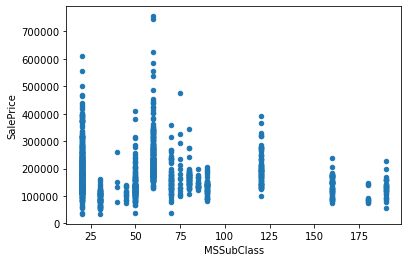

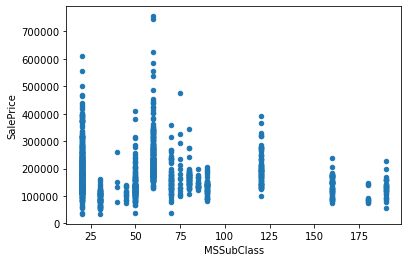

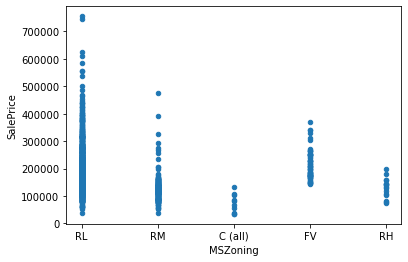

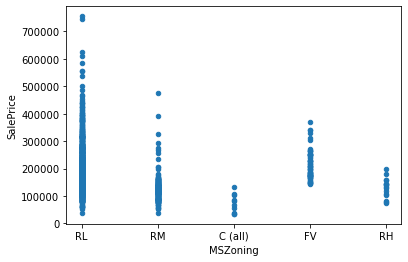

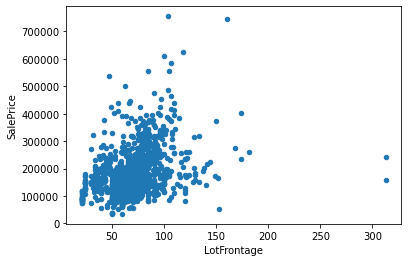

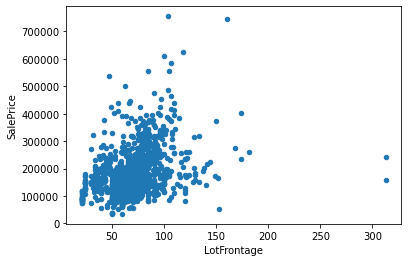

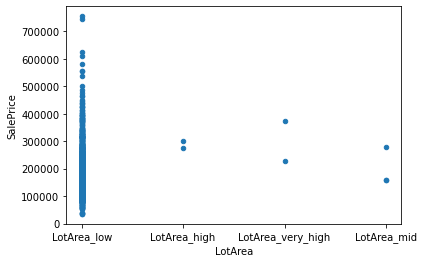

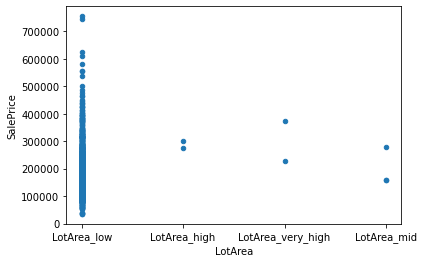

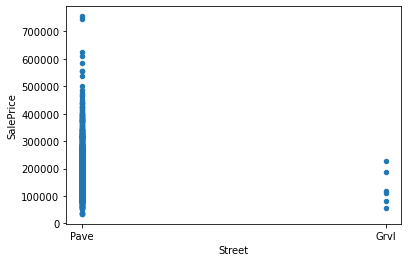

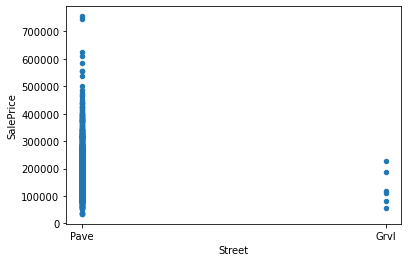

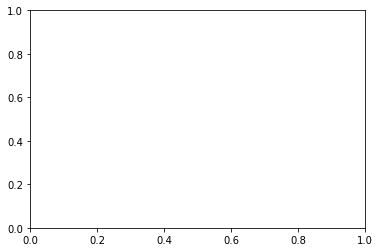

In [357]:
# first pulling all numeric columns to look at
train_x_number = train_x.select_dtypes(include='number')
columns = train_x.columns
color_col = ['GrLivArea', 'OverallQual']

for col in columns[1:-1]:
    for color in color_col:
        train_x.plot(kind='scatter', x=col, y='SalePrice')#, c=color, title=col)
plt.show()
# some of the numeric columns should be catagory columns - can tell by charts below

In [ ]:
from seaborn import heatmap
heatmap(train_x.drop('Id',axis=1).corr())



In [ ]:
train_x.drop('Id',axis=1).corr()

In [ ]:
# just double checking that all the columns are the same
set(train_x.columns) - set(test_x.columns)

In [ ]:
#train_y = train_x.iloc[:, -1]
#train_x = train_x.iloc[:, :-1]

In [ ]:
lr = LinearRegression()
lr.fit(train_x, train_y)

In [ ]:
import seaborn as sns

In [358]:
train_x.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [359]:
train_x['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [498]:
bin_1 = np.linspace(25000, 450000, 18) 
bin_2 = np.array([500000, 550000, 600000, 800000])
bin_ = np.concatenate((bin_1, bin_2))
bin_

array([ 25000.,  50000.,  75000., 100000., 125000., 150000., 175000.,
       200000., 225000., 250000., 275000., 300000., 325000., 350000.,
       375000., 400000., 425000., 450000., 500000., 550000., 600000.,
       800000.])

In [499]:
train_x['SalePrice_cut'] = pd.cut(train_x['SalePrice'], bins=bin_)#np.linspace(25000, 775000, 31))#, right=False)#[col+'_low', col+'_mid', col+'_high', col+'_very_high'])
train_x['SalePrice_cut'] = train_x['SalePrice_cut'].astype('category')

In [500]:
train_x['SalePrice_qcut'] = pd.qcut(train_x['SalePrice'], q=8)#[col+'_low', col+'_mid', col+'_high', col+'_very_high'])
train_x['SalePrice_qcut'] = train_x['SalePrice_qcut'].astype('category')

In [506]:
train_x.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

/Users/paulsprouse/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


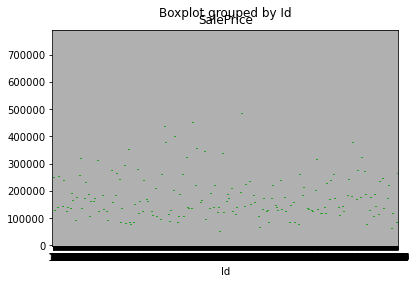

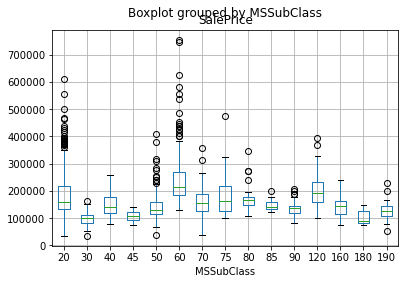

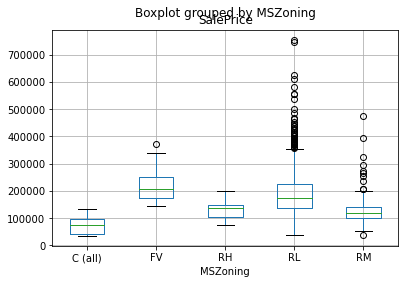

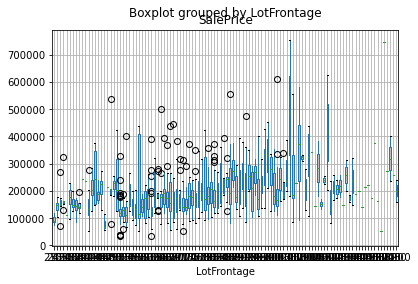

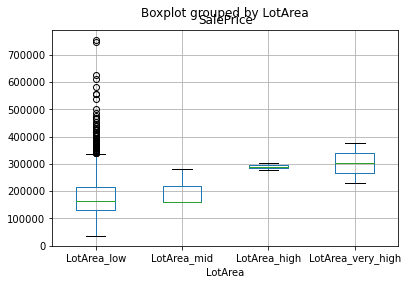

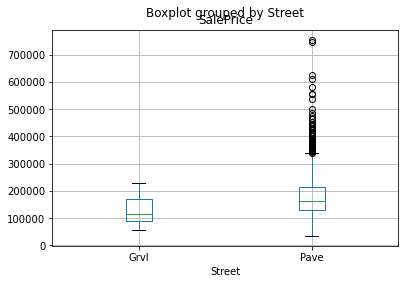

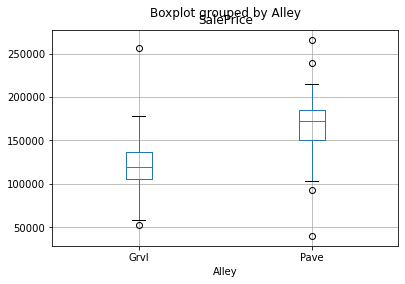

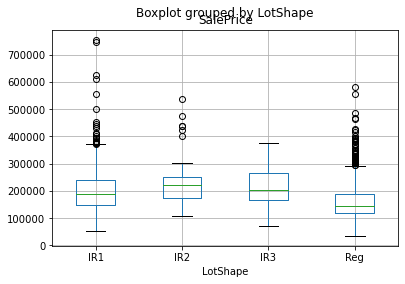

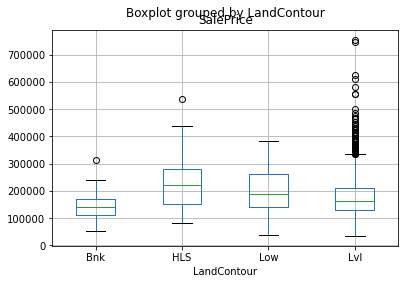

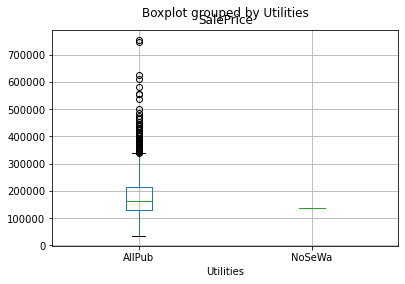

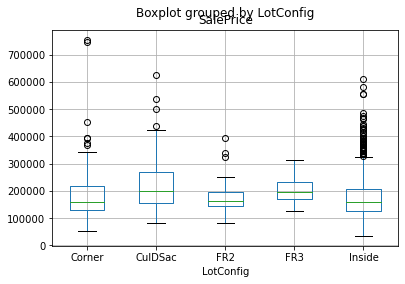

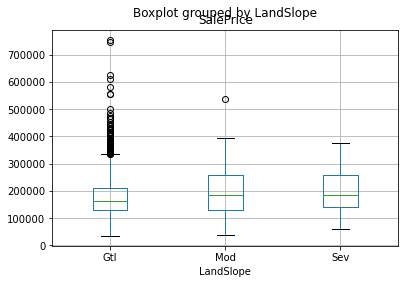

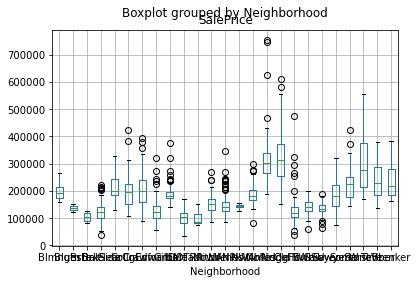

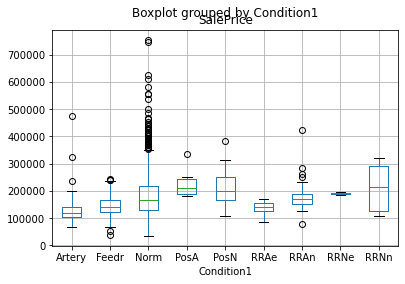

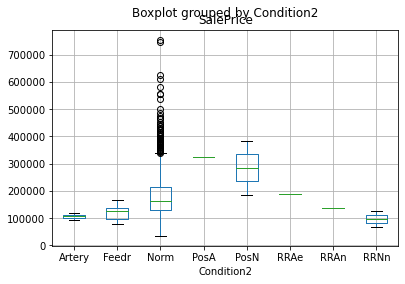

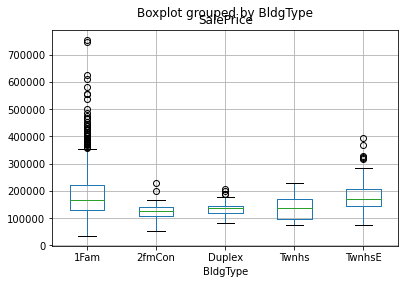

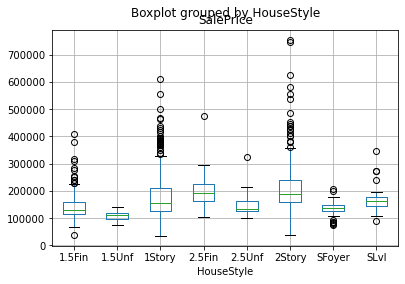

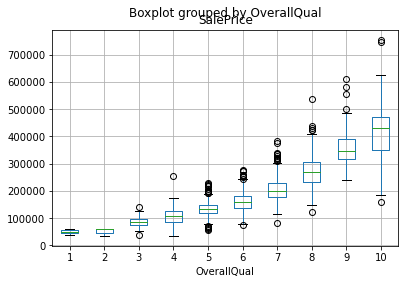

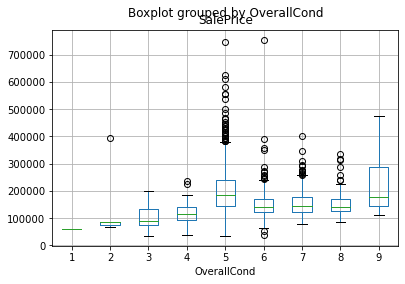

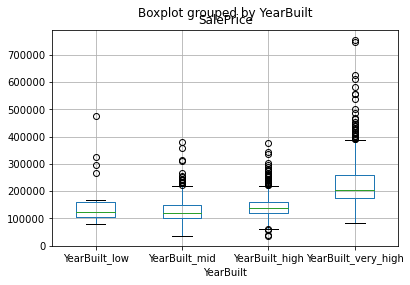

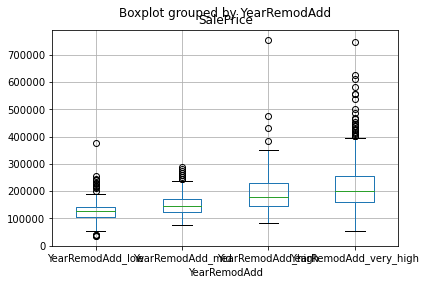

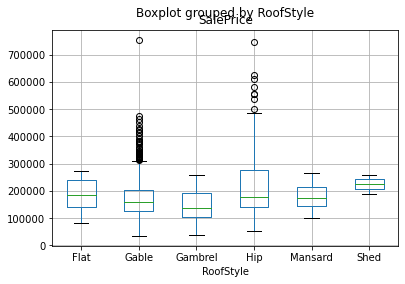

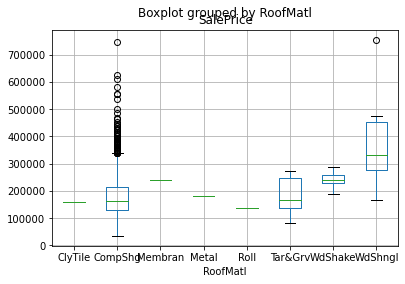

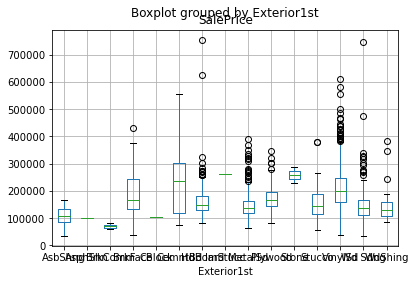

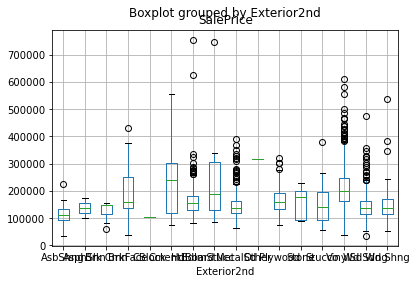

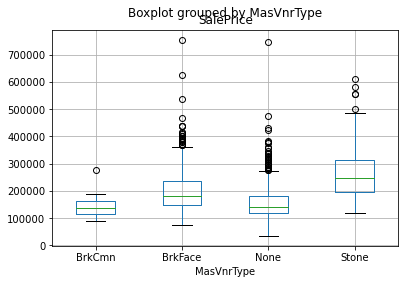

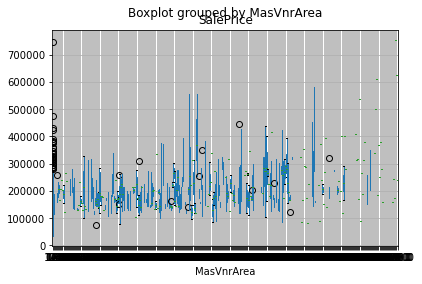

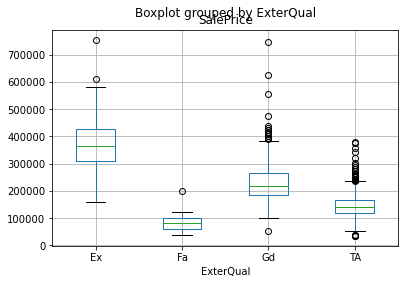

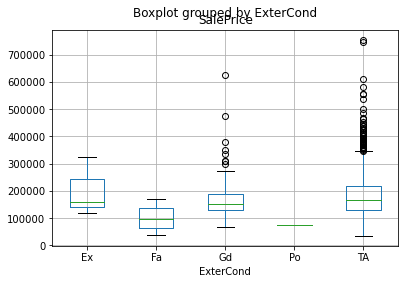

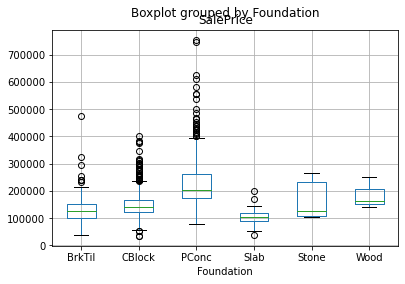

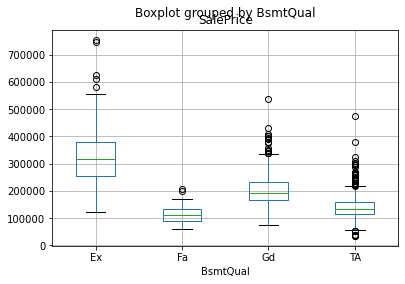

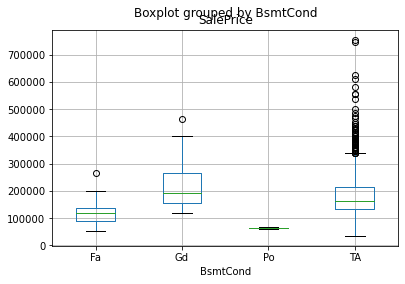

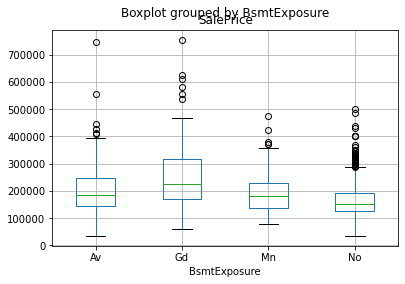

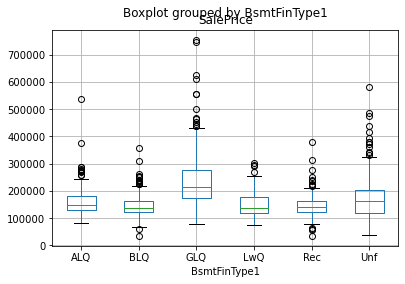

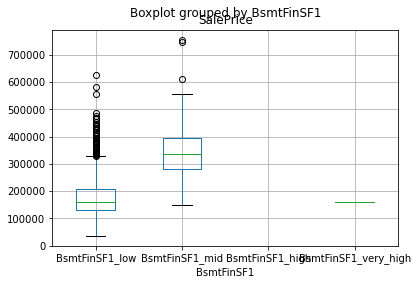

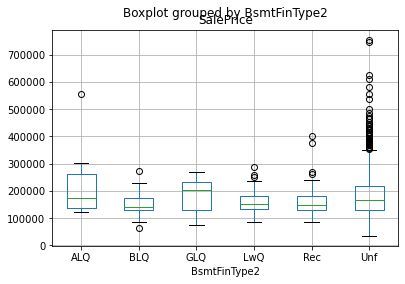

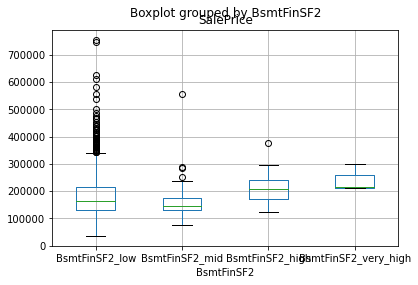

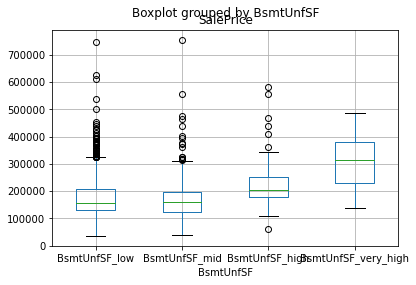

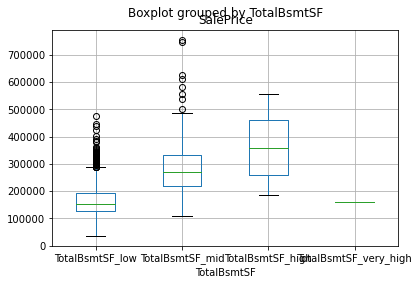

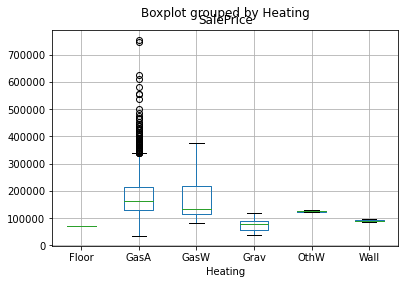

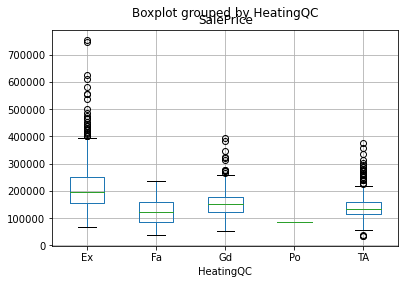

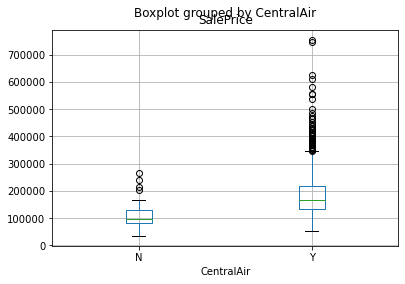

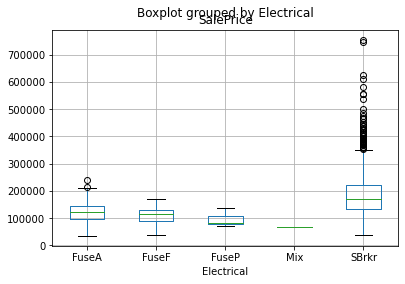

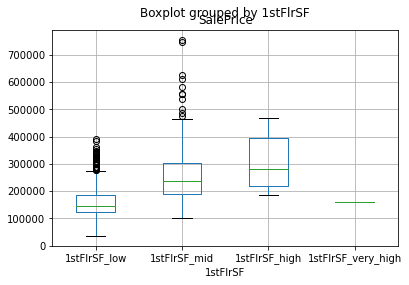

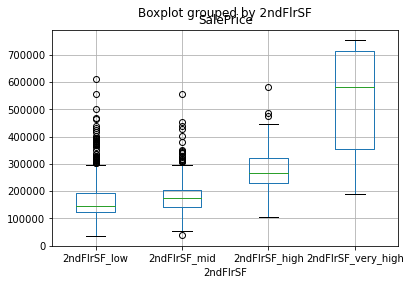

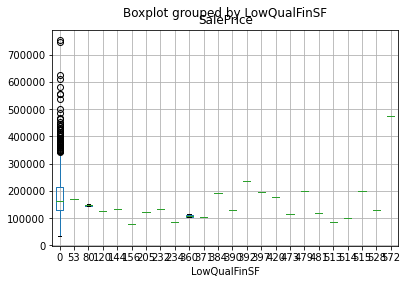

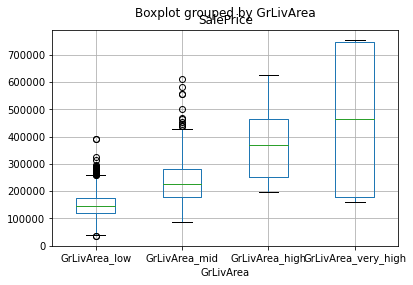

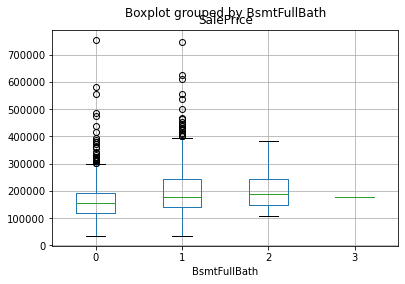

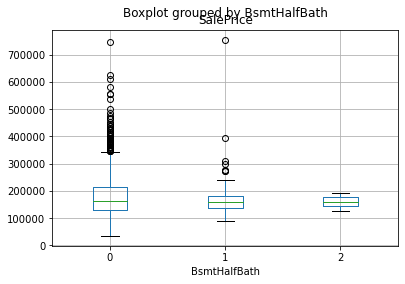

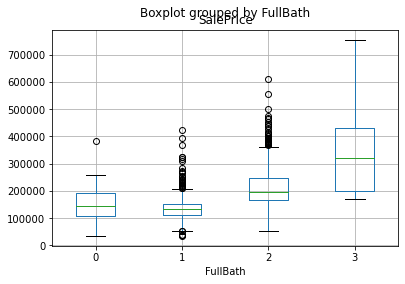

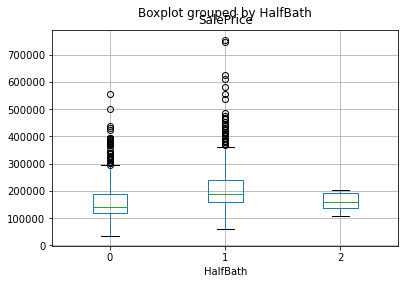

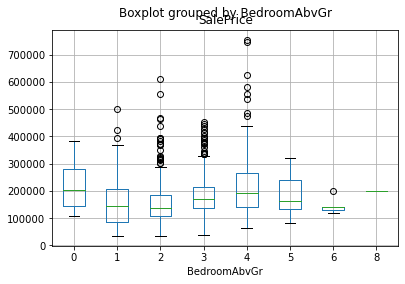

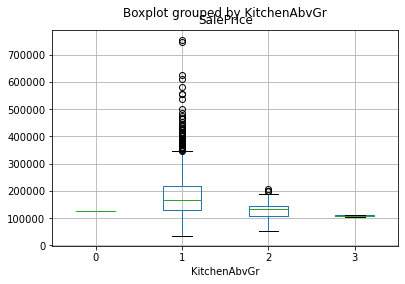

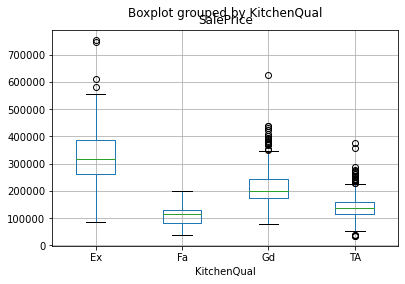

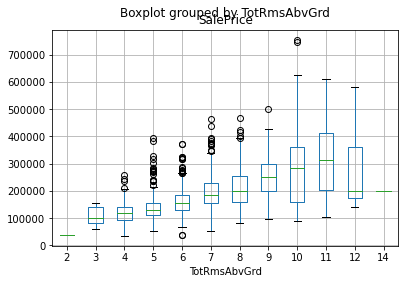

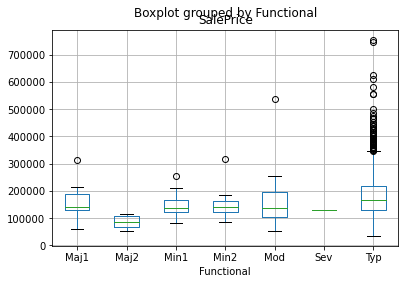

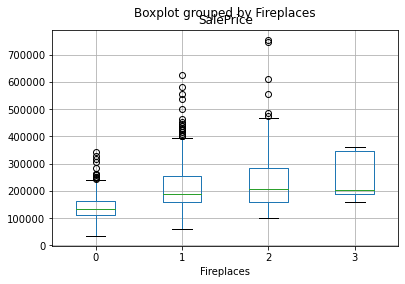

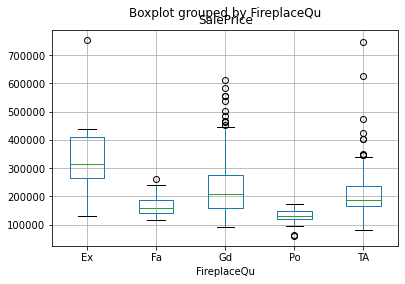

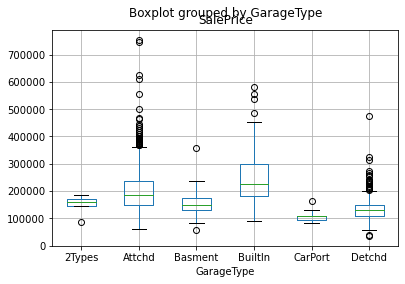

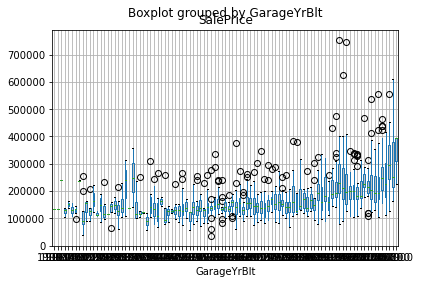

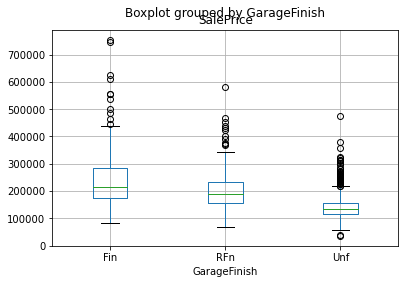

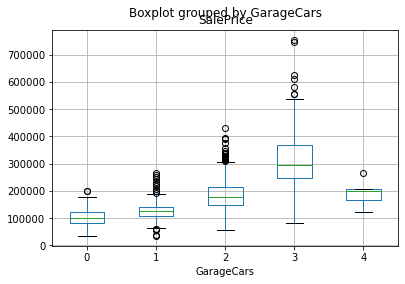

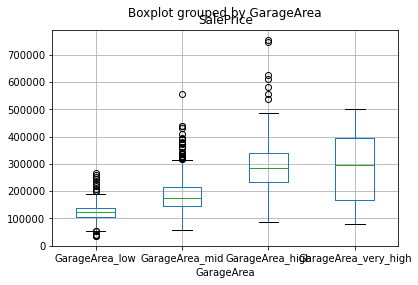

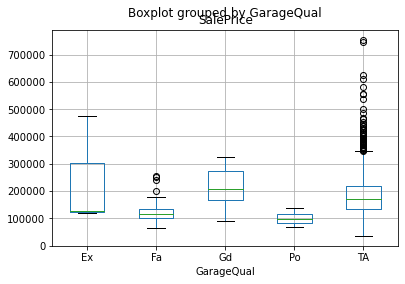

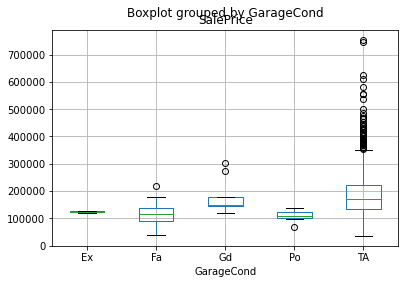

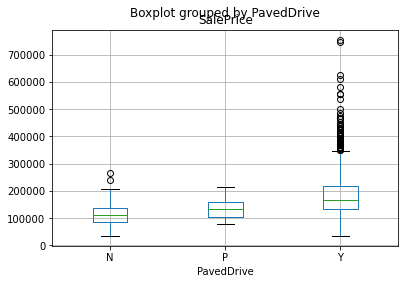

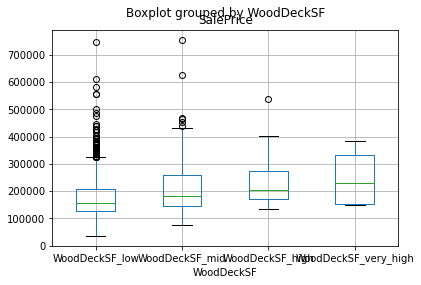

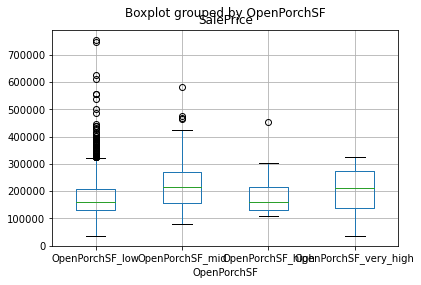

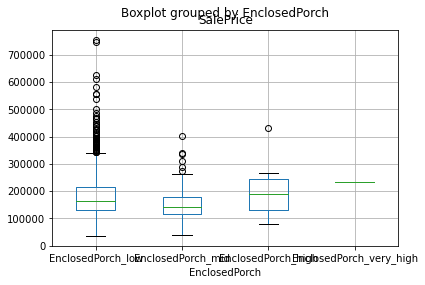

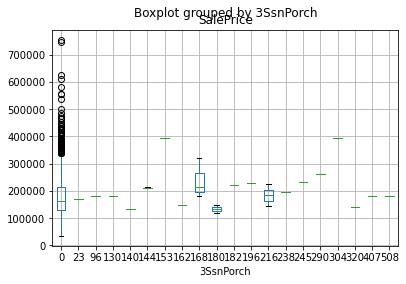

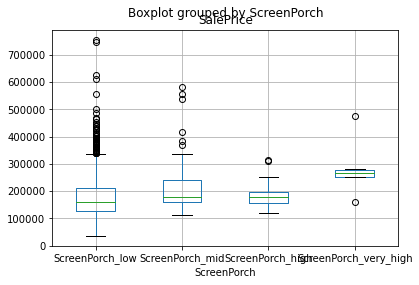

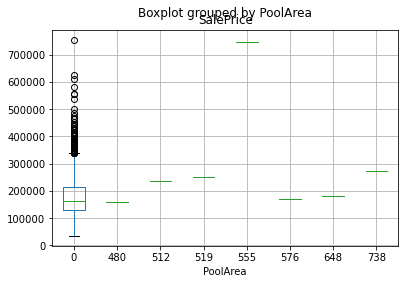

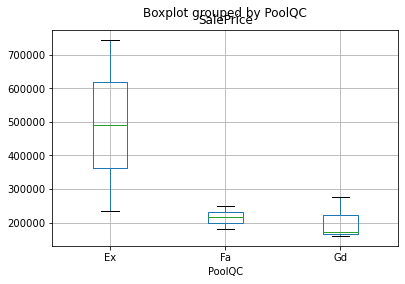

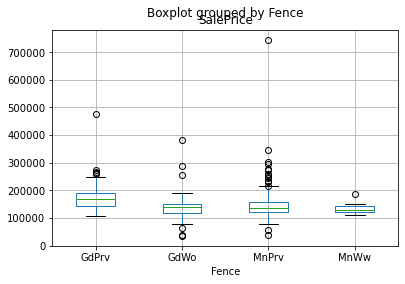

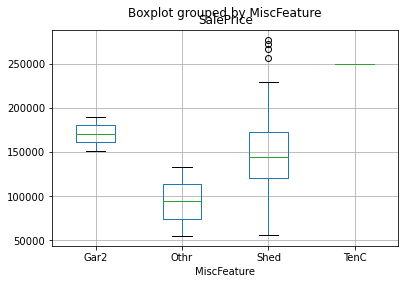

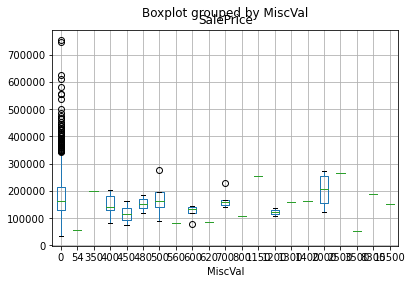

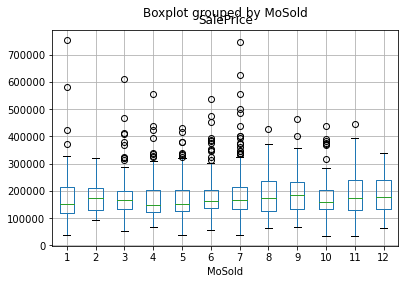

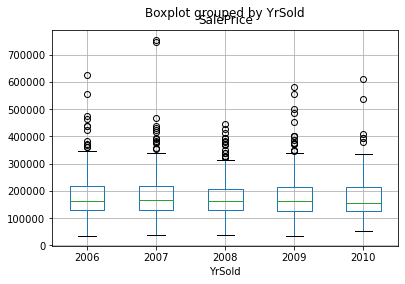

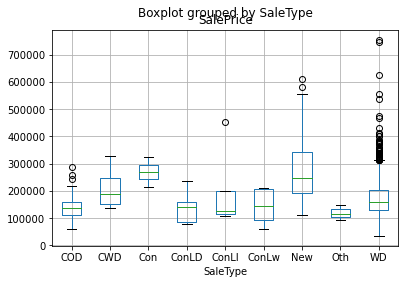

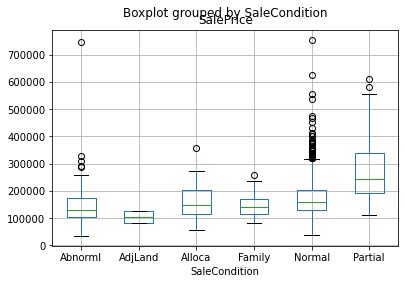

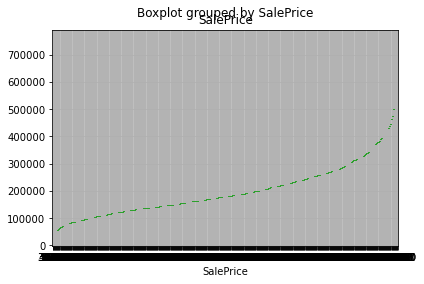

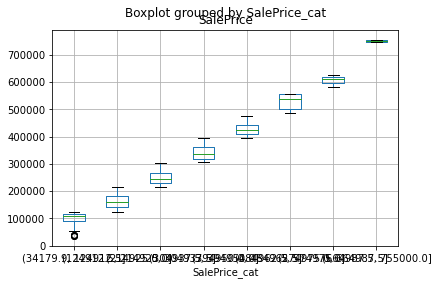

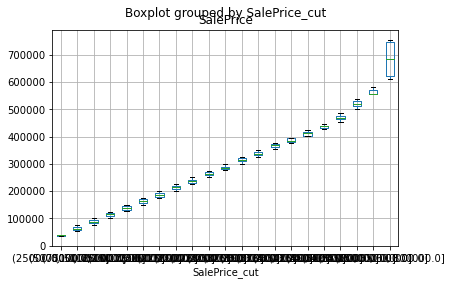

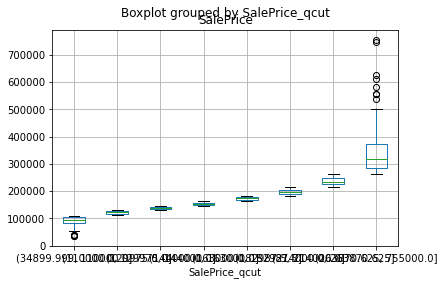

In [507]:
for col in train_x.columns:
    train_x.boxplot('SalePrice', col)

In [501]:
df = train_x.groupby('SalePrice_cut').agg({'SalePrice':['mean','count','min','max']})

In [502]:
df_q = train_x.groupby('SalePrice_qcut').agg({'SalePrice':['mean','count','min','max']})

In [503]:
df

SalePrice                      
                               mean count     min     max
SalePrice_cut                                            
(25000.0, 50000.0]     37482.200000     5   34900   40000
(50000.0, 75000.0]     62738.800000    20   52000   75000
(75000.0, 100000.0]    88863.989796    98   75500  100000
(100000.0, 125000.0]  114741.218085   188  101000  125000
(125000.0, 150000.0]  137728.373377   308  125500  150000
(150000.0, 175000.0]  162916.064516   217  150500  175000
(175000.0, 200000.0]  186251.604061   197  175500  200000
(200000.0, 225000.0]  212769.447368   114  200100  225000
(225000.0, 250000.0]  237250.312500    96  226000  250000
(250000.0, 275000.0]  263721.892308    65  250580  275000
(275000.0, 300000.0]  285150.216216    37  275500  299800
(300000.0, 325000.0]  314060.846154    39  301000  325000
(325000.0, 350000.0]  337449.318182    22  325300  350000
(350000.0, 375000.0]  366999.363636    11  354000  375000
(375000.0, 400000.0]  386559.133333    15  377426  395192
(400000.0, 425000.0]  411691.125000     8  402000  424870
(425000.0, 450000.0]  436365.833333     6  426000  446261
(450000.0, 500000.0]  468690.000000     5  451950  485000
(500000.0, 550000.0]  519918.500000     2  501837  538000
(550000.0, 600000.0]  564838.000000     3  555000  582933
(600000.0, 800000.0]  684164.250000     4  611657  755000

In [468]:
df_q

SalePrice                      
                                 mean count     min     max
SalePrice_qcut                                             
(34899.999, 110000.0]    91048.569149   188   34900  110000
(110000.0, 129975.0]    121533.338983   177  110500  129900
(129975.0, 144000.0]    137284.984127   189  130000  144000
(144000.0, 163000.0]    153278.146067   178  144152  163000
(163000.0, 182987.5]    173440.133333   180  163500  182900
(182987.5, 214000.0]    196701.827957   186  183000  214000
(214000.0, 263870.625]  236389.625698   179  214500  263435
(263870.625, 755000.0]  339707.841530   183  264132  755000

(array([3.13883346e-07, 1.08432429e-06, 2.82495011e-06, 6.62008511e-06,
        7.79001394e-06, 6.22059722e-06, 5.02213353e-06, 2.96762436e-06,
        2.65374101e-06, 1.65502128e-06, 1.19846368e-06, 9.98719736e-07,
        6.84836391e-07, 2.85348496e-07, 4.85092443e-07, 2.28278797e-07,
        1.99743947e-07, 1.14139398e-07, 5.70696992e-08, 2.85348496e-08,
        2.85348496e-08, 5.70696992e-08, 2.85348496e-08, 0.00000000e+00,
        5.70696992e-08, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 5.70696992e-08]),
 array([ 34900.        ,  58903.33333333,  82906.66666667, 106910.        ,
        130913.33333333, 154916.66666667, 178920.        , 202923.33333333,
        226926.66666667, 250930.        , 274933.33333333, 298936.66666667,
        322940.        , 346943.33333333, 370946.66666667, 394950.        ,
        418953.33333333, 442956.66666667, 466960.        , 490963.33333333,
        514966.66666667, 538970.        , 562973.33333333, 586976.66666667

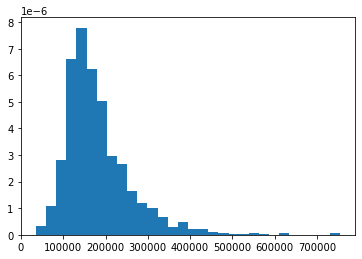

In [480]:
plt.hist(train_x['SalePrice'], density=True, bins=30)

In [508]:
train_x.dtypes

Id                   int64
MSSubClass        category
MSZoning          category
LotFrontage       category
LotArea           category
Street            category
Alley             category
LotShape          category
LandContour       category
Utilities         category
LotConfig         category
LandSlope         category
Neighborhood      category
Condition1        category
Condition2        category
BldgType          category
HouseStyle        category
OverallQual       category
OverallCond       category
YearBuilt         category
YearRemodAdd      category
RoofStyle         category
RoofMatl          category
Exterior1st       category
Exterior2nd       category
MasVnrType        category
MasVnrArea        category
ExterQual         category
ExterCond         category
Foundation        category
BsmtQual          category
BsmtCond          category
BsmtExposure      category
BsmtFinType1      category
BsmtFinSF1        category
BsmtFinType2      category
BsmtFinSF2        category
B

In [510]:
variables = unique_counts(train_x)

In [524]:
variables['Column']

41        CentralAir
5             Street
6              Alley
9          Utilities
50          HalfBath
48      BsmtHalfBath
34        BsmtFinSF1
65        PavedDrive
72            PoolQC
11         LandSlope
60      GarageFinish
8        LandContour
47      BsmtFullBath
46         GrLivArea
44          2ndFlrSF
43          1stFlrSF
62        GarageArea
38       TotalBsmtSF
37         BsmtUnfSF
36        BsmtFinSF2
52      KitchenAbvGr
53       KitchenQual
32      BsmtExposure
31          BsmtCond
27         ExterQual
4            LotArea
30          BsmtQual
66        WoodDeckSF
74       MiscFeature
73             Fence
7           LotShape
25        MasVnrType
70       ScreenPorch
19         YearBuilt
49          FullBath
56        Fireplaces
68     EnclosedPorch
67       OpenPorchSF
20      YearRemodAdd
10         LotConfig
2           MSZoning
40         HeatingQC
64        GarageCond
42        Electrical
15          BldgType
61        GarageCars
63        GarageQual
28         Ex

In [529]:
train_x.loc([variables['Column']])

TypeError: unhashable type: 'list'

In [534]:
x_train = train_x.iloc[:,1:-4]

In [535]:
y_train = train_x['SalePrice']

In [536]:
y_train
x_train

MSSubClass MSZoning LotFrontage      LotArea Street Alley LotShape  \
0            60       RL        65.0  LotArea_low   Pave   NaN      Reg   
1            20       RL        80.0  LotArea_low   Pave   NaN      Reg   
2            60       RL        68.0  LotArea_low   Pave   NaN      IR1   
3            70       RL        60.0  LotArea_low   Pave   NaN      IR1   
4            60       RL        84.0  LotArea_low   Pave   NaN      IR1   
...         ...      ...         ...          ...    ...   ...      ...   
1455         60       RL        62.0  LotArea_low   Pave   NaN      Reg   
1456         20       RL        85.0  LotArea_low   Pave   NaN      Reg   
1457         70       RL        66.0  LotArea_low   Pave   NaN      Reg   
1458         20       RL        68.0  LotArea_low   Pave   NaN      Reg   
1459         20       RL        75.0  LotArea_low   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ...      ScreenPorch PoolArea PoolQC  \
0            Lvl    AllPub    Inside  ...  ScreenPorch_low        0    NaN   
1            Lvl    AllPub       FR2  ...  ScreenPorch_low        0    NaN   
2            Lvl    AllPub    Inside  ...  ScreenPorch_low        0    NaN   
3            Lvl    AllPub    Corner  ...  ScreenPorch_low        0    NaN   
4            Lvl    AllPub       FR2  ...  ScreenPorch_low        0    NaN   
...          ...       ...       ...  ...              ...      ...    ...   
1455         Lvl    AllPub    Inside  ...  ScreenPorch_low        0    NaN   
1456         Lvl    AllPub    Inside  ...  ScreenPorch_low        0    NaN   
1457         Lvl    AllPub    Inside  ...  ScreenPorch_low        0    NaN   
1458         Lvl    AllPub    Inside  ...  ScreenPorch_low        0    NaN   
1459         Lvl    AllPub    Inside  ...  ScreenPorch_low        0    NaN   

      Fence MiscFeature MiscVal MoSold YrSold SaleType SaleCondition  
0       NaN         NaN       0      2   2008       WD        Normal  
1       NaN         NaN       0      5   2007       WD        Normal  
2       NaN         NaN       0      9   2008       WD        Normal  
3       NaN         NaN       0      2   2006       WD       Abnorml  
4       NaN         NaN       0     12   2008       WD        Normal  
...     ...         ...     ...    ...    ...      ...           ...  
1455    NaN         NaN       0      8   2007       WD        Normal  
1456  MnPrv         NaN       0      2   2010       WD        Normal  
1457  GdPrv        Shed    2500      5   2010       WD        Normal  
1458    NaN         NaN       0      4   2010       WD        Normal  
1459    NaN         NaN       0      6   2008       WD        Normal  

[1460 rows x 79 columns]

In [537]:
lr = LinearRegression()

In [540]:
x = pd.get_dummies(data=x_train, drop_first=True)

In [541]:
lr.fit(x, y_train)

LinearRegression()

In [542]:
lr.intercept_

68820978953130.195

In [544]:
coeff_parm = pd.DataFrame(lr.coef_, x.columns, columns=['Coeffiecient'])

In [560]:
pd.set_option('display.max_rows', 1000)
print(coeff_parm['Coeffiecient'])

MSSubClass_30                           -1.277107e+04
MSSubClass_40                            2.179982e+04
MSSubClass_45                           -1.131696e+04
MSSubClass_50                            3.883293e+03
MSSubClass_60                            7.875570e+03
MSSubClass_70                            1.119805e+04
MSSubClass_75                           -2.747077e+04
MSSubClass_80                           -1.113481e+04
MSSubClass_85                           -1.524889e+04
MSSubClass_90                            1.101084e+16
MSSubClass_120                          -2.640746e+04
MSSubClass_160                          -3.377110e+04
MSSubClass_180                          -4.701296e+04
MSSubClass_190                          -9.496129e+03
MSZoning_FV                              5.496713e+04
MSZoning_RH                              4.768610e+04
MSZoning_RL                              5.195712e+04
MSZoning_RM                              4.135316e+04
LotFrontage_24.0            

In [559]:
type(coeff_parm)

pandas.core.frame.DataFrame

In [557]:
for key, val in dict(coeff_parm):#['Coeffiecient']:
    print(val)

ValueError: too many values to unpack (expected 2)

In [514]:
x_train

Id MSSubClass MSZoning LotFrontage LotArea Street Alley LotShape  \
0    NaN        NaN      NaN         NaN     NaN    NaN   NaN      NaN   
1    NaN        NaN      NaN         NaN     NaN    NaN   NaN      NaN   
2    NaN        NaN      NaN         NaN     NaN    NaN   NaN      NaN   
3    NaN        NaN      NaN         NaN     NaN    NaN   NaN      NaN   
4    NaN        NaN      NaN         NaN     NaN    NaN   NaN      NaN   
...   ..        ...      ...         ...     ...    ...   ...      ...   
1455 NaN        NaN      NaN         NaN     NaN    NaN   NaN      NaN   
1456 NaN        NaN      NaN         NaN     NaN    NaN   NaN      NaN   
1457 NaN        NaN      NaN         NaN     NaN    NaN   NaN      NaN   
1458 NaN        NaN      NaN         NaN     NaN    NaN   NaN      NaN   
1459 NaN        NaN      NaN         NaN     NaN    NaN   NaN      NaN   

     LandContour Utilities  ... MiscFeature MiscVal MoSold YrSold SaleType  \
0            NaN       NaN  ...         NaN     NaN    NaN    NaN      NaN   
1            NaN       NaN  ...         NaN     NaN    NaN    NaN      NaN   
2            NaN       NaN  ...         NaN     NaN    NaN    NaN      NaN   
3            NaN       NaN  ...         NaN     NaN    NaN    NaN      NaN   
4            NaN       NaN  ...         NaN     NaN    NaN    NaN      NaN   
...          ...       ...  ...         ...     ...    ...    ...      ...   
1455         NaN       NaN  ...         NaN     NaN    NaN    NaN      NaN   
1456         NaN       NaN  ...         NaN     NaN    NaN    NaN      NaN   
1457         NaN       NaN  ...         NaN     NaN    NaN    NaN      NaN   
1458         NaN       NaN  ...         NaN     NaN    NaN    NaN      NaN   
1459         NaN       NaN  ...         NaN     NaN    NaN    NaN      NaN   

     SaleCondition SalePrice SalePrice_cat SalePrice_cut SalePrice_qcut  
0              NaN       NaN           NaN           NaN            NaN  
1              NaN       NaN           NaN           NaN            NaN  
2              NaN       NaN           NaN           NaN            NaN  
3              NaN       NaN           NaN           NaN            NaN  
4              NaN       NaN           NaN           NaN            NaN  
...            ...       ...           ...           ...            ...  
1455           NaN       NaN           NaN           NaN            NaN  
1456           NaN       NaN           NaN           NaN            NaN  
1457           NaN       NaN           NaN           NaN            NaN  
1458           NaN       NaN           NaN           NaN            NaN  
1459           NaN       NaN           NaN           NaN            NaN  

[1460 rows x 84 columns]

/Users/paulsprouse/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/paulsprouse/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/paulsprouse/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/paulsprouse/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/paulsprouse/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


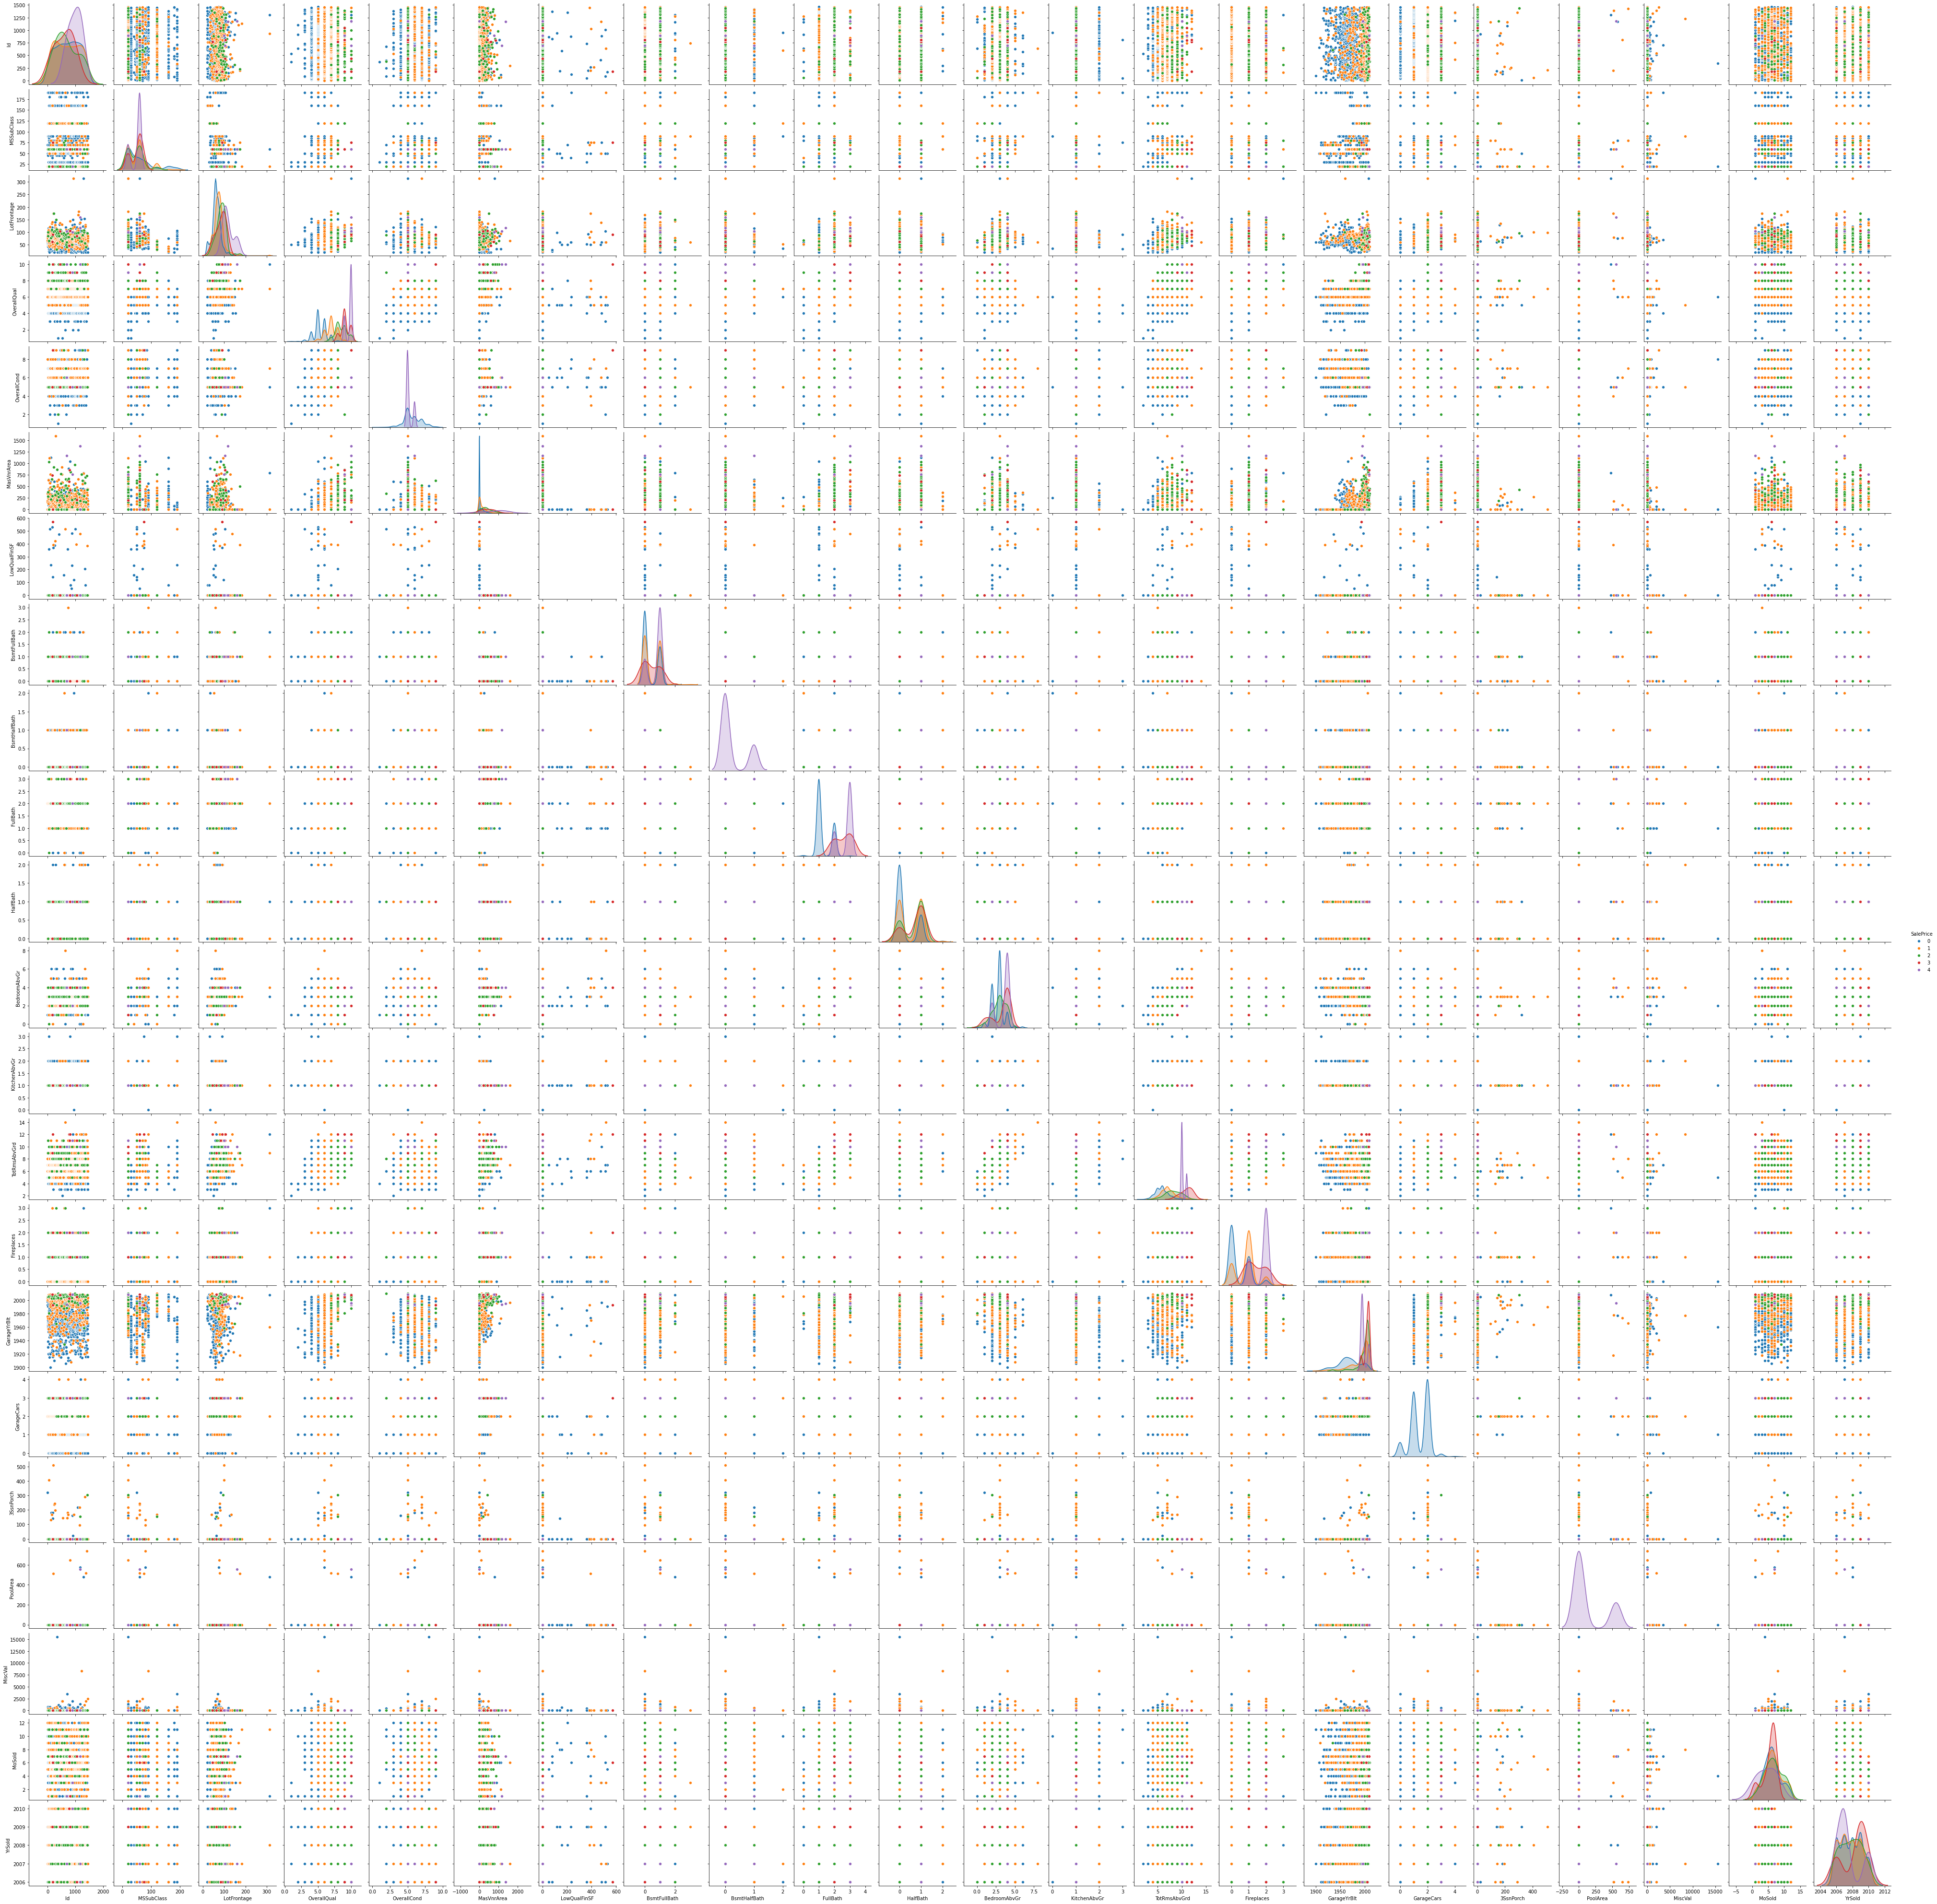

In [335]:
sns_plot = sns.pairplot(train_x, hue='SalePrice')
plt.savefig('pair_plot.png')
sns_plot

In [ ]:
col_list = train.columns

In [21]:
count_nan = len(train) - train.count()

In [22]:
print(count_nan)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [56]:
print(train.sort_values('Alley', ascending=False))

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
711    712          50  C (all)         66.0     8712   Pave  Pave      Reg   
831    832         160       FV         30.0     3180   Pave  Pave      Reg   
525    526          20       FV         62.0     7500   Pave  Pave      Reg   
578    579         160       FV         34.0     3604   Pave  Pave      Reg   
603    604         160       FV         30.0     3182   Pave  Pave      Reg   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [40]:
for n in range(10000):
    x = (len(train) - train.count())

In [41]:
for n in range(10000):
    y = train.isna().sum()